<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Инструкция по выполнению проекта**
- Загрузите и изучите данные.
- Ответьте на вопрос и обоснуйте решение. 
- Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 - Изменится. Приведите примеры матриц.
 - Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
- Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
- Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

**Описание данных**

Набор данных находится в файле `/datasets/insurance.csv`

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv('/datasets/insurance.csv')
insurance.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
insurance.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<AxesSubplot:>

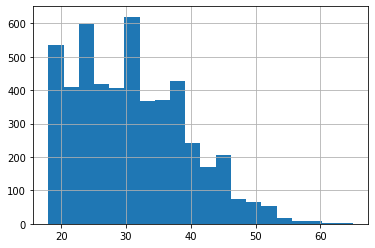

In [27]:
insurance['Возраст'].hist(bins=20)

<AxesSubplot:>

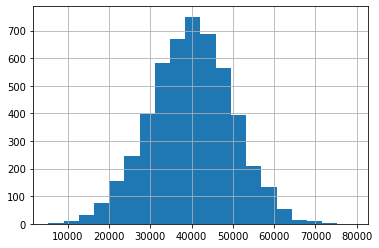

In [26]:
insurance['Зарплата'].hist(bins=20)

<AxesSubplot:>

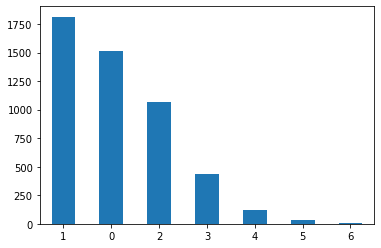

In [21]:
insurance['Члены семьи'].value_counts().plot(kind='bar', rot=0)

In [25]:
insurance['Пол'].value_counts(normalize=True)

0    0.501
1    0.499
Name: Пол, dtype: float64

In [24]:
insurance['Страховые выплаты'].value_counts(normalize=True)

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

**Выводы по этапу:**
- данные загружены
- пропусков нет
- указанные типы данных позволяют работать с моделями машинного обучения
- распределение возраста клиентов скошено вправо: в датасете большое число клиентов моложе 40 лет
- распределение дохода клиентов в датасете близко к нормальному
- как правило, у клиента или нет членов семьи или 1-2 человека
- дисбаланс клиентов по полу в датасете практически отсутствует
- около 90% клиентов ни разу не получали страховых выплат, 8,5% получали страховые выплаты единожды, еще 2,3% - дважды

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** показатель R2-метрики не изменится.

**Обоснование:**

1. Метрика R2 для незакодированной матрицы признаков X вычисляется следующим образом:

$$
R2 = 1 - \frac{\sum(y-Xw)^{2}}{\sum(y-\bar{y})^{2}}
$$

2. Кодируем матрицу признаков X с помощью обратимой матрицы А, выходит:

$$
X' = XA
$$

3. Измененный вектор весов линейной регрессии в таком случае будет равен:

$$
w' = ((XA)^T(XA))^{-1} (XA)^Ty =
A^{-1}((XA)^{T}X)^{-1} (XA)^Ty = 
A^{-1}((XA)^{T}X)^{-1} A^TX^Ty = 
A^{-1}(A^TX^TX)^{-1} A^TX^Ty = 
A^{-1}(X^TX)^{-1}(A^T)^{-1} A^TX^Ty
= A^{-1}((X^TX)^{-1}X^Ty) = A^{-1}w
$$

4. Выходит, что:

$$
R2' = 1 - \frac{\sum(y-X'w')^{2}}{\sum(y-\bar{y})^{2}} = 1 - \frac{\sum(y-(XA)(A^{-1}w))^{2}}{\sum(y-\bar{y})^{2}} = 1 - \frac{\sum(y-Xw)^{2}}{\sum(y-\bar{y})^{2}} = R2
$$

**Вывод по этапу:** при умножении матрицы признаков на обратимую матрицу метрика R2 не изменится.

## Алгоритм преобразования

**Алгоритм**

1. Отделяем целевой признак и признаки, преобразуем их в матричный вид
2. Делим датасет на тренировочную и тестовую выборки 
3. Создаем матрицу 4x4 и проверяем ее обратимость
4. С помощью матрицы кодирования кодируем признаки

**Обоснование**

Поскольку матрица признаков будет содержать имеет размер 5000х4, то умножать нужно на обратную матрицу 4х4, чтобы сохранилось исходная ширина матрицы. Длина преобразованной матрицы сохранится, если умножать матрицу признаков на обратимую матрицу (не наоборот, иначе умножение будет невозможно). Датасет разделен на тренировочную и тестовую выборки до кодировки: таким образом гарантируется, что значения признаков обычного и закодированного наборов будут идентичны.

In [5]:
#отделение целевого признака от других признаков
features = insurance.drop(columns='Страховые выплаты').values
target = insurance['Страховые выплаты'].values

In [6]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=.3)
print(f'Размер матрицы признаков тренировочной выборки: {train_features.shape}\nРазмер матрицы признаков тестовой выборки: {test_features.shape}')

Размер матрицы признаков тренировочной выборки: (3500, 4)
Размер матрицы признаков тестовой выборки: (1500, 4)


In [7]:
#генерируем обратимую матрицу
np.random.seed(123)
matrix = np.random.rand(4, 4)
inv_matrix = np.linalg.inv(matrix)
inv_matrix

array([[ 2.87678251,  0.14768629, -2.24879792, -0.06459009],
       [-0.58011171,  0.19553257,  3.20632074, -2.91553246],
       [-1.12144729,  1.44251433, -0.77907444,  0.2688062 ],
       [-1.057827  , -0.88161067,  1.49732637,  1.48418743]])

Код выдал обратную матрицу, значит сгенерированная матрица обратима. Умножим на обратную матрицу признаки и проверим длину преобразованной матрицы признаков.

In [8]:
enc_train_features = np.dot(train_features, inv_matrix)
enc_test_features = np.dot(test_features, inv_matrix)
print(f'Размер преобразованной тренировочной выборки: {enc_train_features.shape}\nРазмер преобразованной тестовой выборки: {enc_test_features.shape}')

Размер преобразованной тренировочной выборки: (3500, 4)
Размер преобразованной тестовой выборки: (1500, 4)


**Выводы по этапу:**
- предложен и обоснован поэтапный алгоритм преобразования данных
- был отделен целевой признак от остальных признаков
- данные разделены на тренировочную и тестовую выборки в соотношении 70 на 30
- признаки тренировочного и тестового наборов умножены на матрицу, обратную сгенерированной

## Проверка алгоритма

In [9]:
#обучаем модель, делаем предсказания, проверяем метрику R2 на обычных данных
model = LinearRegression()
model.fit(train_features, train_target)
pred = model.predict(test_features)
r2_score(test_target, pred)

0.4221819280444058

In [10]:
#обучаем модель, делаем предсказания, проверяем метрику R2 на обычных данных
model_enc = LinearRegression()
model_enc.fit(enc_train_features, train_target)
pred = model_enc.predict(enc_test_features)
r2_score(test_target, pred)

0.4221819280443393

**Вывод:** метрика R2 различается в преобразованных данных только после 12 знака после запятой. Различия могут быть связаны с процессами округления показателей, которые заложены "под капотом" линейной регрессии в sklearn.